# AIN 214 - PA4 - 2023
## Building kNN and Logistic Regression Classifiers


# THE STUDENT INFO
## Student Name: Talha Kaba
## Student ID: ****7650\*\*

# Dataset: We will use the Breast Cancer Wisconsin (Diagnostic) Dataset available on Kaggle for the assignment. 
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## 1. Data Preprocessing

In this section, you will:
- Import necessary libraries
- Load the dataset
- Handle missing values and outliers
- Convert non-numeric values to numeric 
- Perform data normalization

In [42]:
import pandas as pd

db = pd.read_csv('data.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
display(db.head())
# HANDLE MISSING DATA

# drop Unnamed: 32 column
db.drop('Unnamed: 32', axis=1, inplace=True)
display(db.head())
# count number of missing values in each column
display(db.isnull().sum())
# there are no missing values

# define a function for converting categorical data to numerical data
# function will take a column as input and return a column as output
def convert_categorical_to_numerical(column):
    # define a dictionary to map categories to numerical values
    category_mapping = {'M': 0, 'B': 1}
    
    # apply the mapping to the column
    converted_column = column.map(category_mapping)
    
    return converted_column

# define a function for normalizing data
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data



# convert categorical data to numerical data by calling the function
db['diagnosis'] = convert_categorical_to_numerical(db['diagnosis'])


display(db.head(20))

#convert categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
db['diagnosis'] = le.fit_transform(db['diagnosis'])
display(db.head(20))


# normalize the data except id and diagnosis columns
normalized_data = normalize_data(db.iloc[:, 2:])
normalized_db = pd.DataFrame(normalized_data, columns=db.columns[2:])

# append id and diagnosis columns to normalized data
normalized_db = pd.concat([db[['id', 'diagnosis']], normalized_db], axis=1)
display(normalized_db.head())







,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.013080,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.040060,0.03832,0.020580,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.074580,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.024610,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,0,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.033450,0.03672,0.011370,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,0,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.013820,0.02254,0.010390,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,0,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.030290,0.02488,0.014480,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,0,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.035020,0.03553,0.012260,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,0,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,0.356147,0.120469,0.369034,0.273811,0.159296,0.351398,0.135682,0.300625,0.311645,0.183042,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,842517,0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,0.156437,0.082589,0.124440,0.125660,0.119387,0.081323,0.046970,0.253836,0.084539,0.091110,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,84300903,0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,0.229622,0.094303,0.180370,0.162922,0.150831,0.283955,0.096768,0.389847,0.205690,0.127006,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,84348301,0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,0.139091,0.175875,0.126655,0.038155,0.251453,0.543215,0.142955,0.353665,0.728148,0.287205,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,84358402,0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,0.233822,0.093065,0.220563,0.163688,0.332359,0.167918,0.143636,0.357075,0.136179,0.145800,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## 2. Data Visualization

Visualize the data to understand it better:
- Correlation heatmap
- Distribution plots for at least 3 features


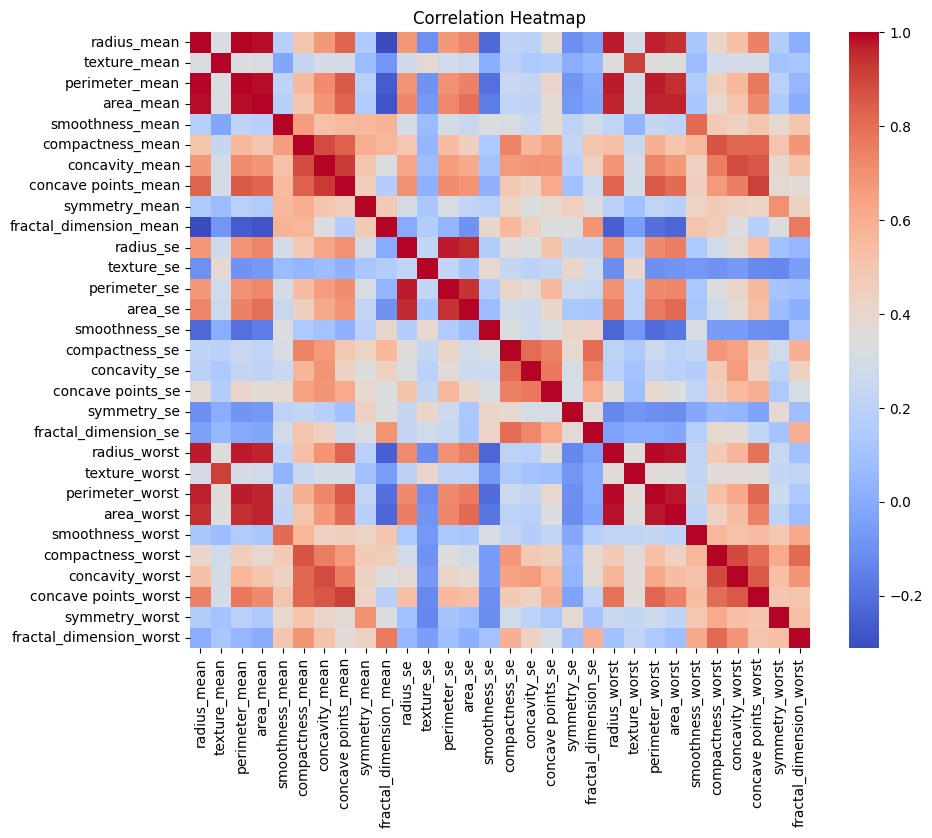

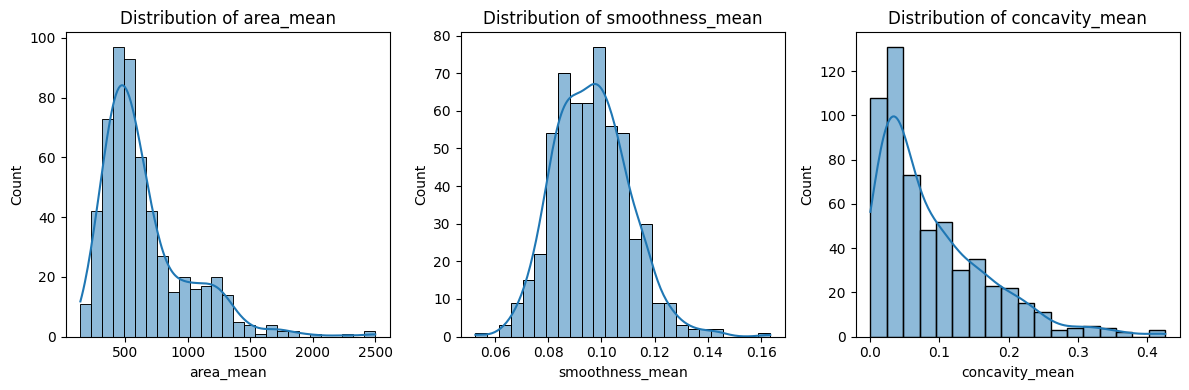

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
corr = db.iloc[:, 2:].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution plots for at least 3 features
features = ['area_mean', 'smoothness_mean', 'concavity_mean']
plt.figure(figsize=(12, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=db, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## 3. Data Splitting

Manually split the data into training and testing sets in a 70:30 ratio:
- Shuffle and split the data
- Avoid using predefined functions like train_test_split for this task


In [3]:
import numpy as np

def shuffle_and_split_data(data, labels, test_ratio=0.3):
    # Get the number of samples
    num_samples = len(data)
    
    # Generate random indices
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    
    # Calculate the number of samples for the testing set
    num_test_samples = int(num_samples * test_ratio)
    
    # Split the indices into training and testing sets
    train_indices = indices[num_test_samples:]
    test_indices = indices[:num_test_samples]
    
    # Split the data and labels based on the indices
    train_data = data[train_indices]
    train_labels = labels[train_indices]
    test_data = data[test_indices]
    test_labels = labels[test_indices]
    
    return train_data, train_labels, test_data, test_labels





## 4. Model Building

### 4.1. kNN Classifier

- Build and train the kNN model
- Choose the optimal k value using Minkowski distance with at least two different values for p 

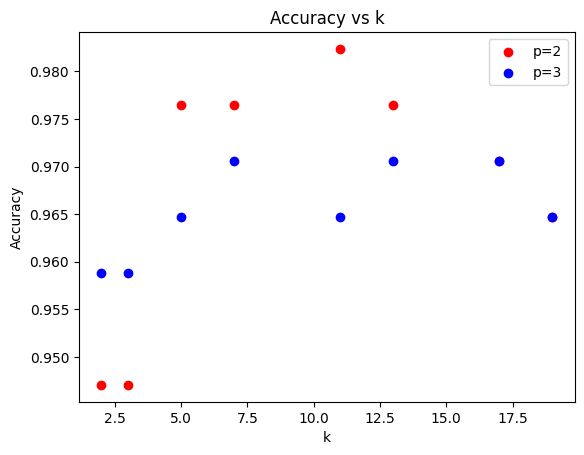

Best k value for p=2: 11
Best k value for p=3: 7


In [37]:
from collections import Counter
import matplotlib.pyplot as plt

# build knn model for training and testing
class KNNModel:
    def __init__(self, k=3, p=2):
        """
        Initializes the class object.

        Parameters:
        - k (int): The number of nearest neighbors to consider (default: 3).
        - p (int): The power parameter for the Minkowski distance metric (default: 2).
        """
        self.X_train = None
        self.y_train = None
        self.k = k
        self.p = p
        
    
    def fit(self, X_train, y_train):
        """
        Fit the model to the training data.

        Parameters:
        X_train (array-like): The input features of the training data.
        y_train (array-like): The target values of the training data.
        """
        self.X_train = X_train
        self.y_train = y_train
    
    def predict(self, X_test):
        """
        Predicts the class labels for the given test data.

        Parameters:
        - X_test (list): The test data to be classified.

        Returns:
        - y_pred (list): The predicted class labels for the test data.
        """
        y_pred = []
        for x in X_test:
            distances = []
            for i, x_train in enumerate(self.X_train):
                distance = self.minkowski_distance(x, x_train, self.p)
                distances.append((distance, self.y_train[i]))
            
            distances.sort(key=lambda x: x[0])
            k_nearest = distances[:self.k]
            labels = [label for _, label in k_nearest]
            most_common = Counter(labels).most_common(1)
            y_pred.append(most_common[0][0])
        
        return y_pred
    
    def minkowski_distance(self, a, b, p):
        """
        Calculates the Minkowski distance between two points.
        
        Parameters:
        a (list): The first point.
        b (list): The second point.
        p (float): The power parameter for the Minkowski distance formula.
        
        Returns:
        float: The Minkowski distance between the two points.
        """
        return sum(abs(e1-e2)**p for e1, e2 in zip(a, b))**(1/p)


# Train the knn model
# Shuffle and split the data
# Shuffle and split the data
train_data, train_labels, test_data, test_labels = shuffle_and_split_data(normalized_db.iloc[:, 2:].values, normalized_db['diagnosis'].values, test_ratio=0.3)

# Train the knn model
# For k=3 and p=2
knn_model = KNNModel(k=3, p=2)
knn_model.fit(train_data, train_labels)

# Predict using the knn model
knn_predictions = knn_model.predict(test_data)


# For k=3 and p=3
knn_model2 = KNNModel(k=3, p=3)
knn_model2.fit(train_data, train_labels)


knn_predictions2 = knn_model2.predict(test_data)


# choose the best k value
knn_models2 = [] # for p = 2
knn_models3 = [] # for p = 3

def isPrime(n):
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

# add knn models for k=1 to k=20 only prime numbers p = 2
for k in range(1, 21):
    if isPrime(k):
        knn_models2.append(KNNModel(k=k, p=2))

# add knn models for k=1 to k=20 only prime numbers p = 3
for k in range(1, 21):
    if isPrime(k):
        knn_models3.append(KNNModel(k=k, p=3))


# train knn models and predict, then check the accuracy, choose the best k value
from sklearn.metrics import accuracy_score

# For p = 2
knn_accuracies2 = []
for model in knn_models2:
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    knn_accuracies2.append(accuracy)
    
# For p = 3
knn_accuracies3 = []
for model in knn_models3:
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    accuracy = accuracy_score(test_labels, predictions)
    knn_accuracies3.append(accuracy)

def primes(n):
    primes = []
    for i in range(2, n):
        if isPrime(i):
            primes.append(i)
    return primes

k_values = primes(21)

# Plot the accuracies
for i, k in enumerate(k_values):
    plt.scatter(k, knn_accuracies2[i], color='red')
    plt.scatter(k, knn_accuracies3[i], color='blue')
plt.legend(['p=2', 'p=3'])
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

# best k value for p = 2 
best_k2 = k_values[np.argmax(knn_accuracies2)]
print(f'Best k value for p=2: {best_k2}')
# best k value for p = 3
best_k3 = k_values[np.argmax(knn_accuracies3)]
print(f'Best k value for p=3: {best_k3}')


def find_best_k_value(knn_accuracies2, knn_accuracies3, k_values):
    """Find the best k value for the KNN model.

    Args:
        knn_accuracies2 (list): List of accuracies for k values with p=2.
        knn_accuracies3 (list): List of accuracies for k values with p=3.
        k_values (list): List of k values.

    Returns:
        KNNModel: The best KNN model with the highest accuracy.
    """
    best_k2 = k_values[np.argmax(knn_accuracies2)]
    best_k3 = k_values[np.argmax(knn_accuracies3)]

    if best_k2 == best_k3:
        return KNNModel(k=best_k2, p=2)
    else:
        return KNNModel(k=best_k3, p=3)


### 4.2. Logistic Regression

- Build and train the Logistic Regression model

In [38]:

import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initializes the LogisticRegression object.

        Parameters:
        learning_rate (float): The learning rate for gradient descent. Default is 0.01.
        num_iterations (int): The number of iterations for gradient descent. Default is 1000.

        Returns:
        None
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        """
        Computes the sigmoid function.

        Parameters:
        z (float): The input value.

        Returns:
        float: The output of the sigmoid function.
        """
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        """
        Fits the logistic regression model to the training data.

        Parameters:
        X (array-like): The input features of shape (num_samples, num_features).
        y (array-like): The target values of shape (num_samples,).

        Returns:
        None
        """
        num_samples, num_features = X.shape

        self.weights = np.zeros(num_features)
        self.bias = 0

        for _ in range(self.num_iterations):

            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        """
        Predicts the class labels for the input features.

        Parameters:
        X (array-like): The input features of shape (num_samples, num_features).

        Returns:
        y_pred_class (array-like): The predicted class labels of shape (num_samples,).
        """
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_model)
        y_pred_class = np.where(y_pred >= 0.5, 1, 0)
        return y_pred_class
    

# Train the logistic regression model
# Shuffle and split the data
train_data, train_labels, test_data, test_labels = shuffle_and_split_data(normalized_db.iloc[:, 2:].values, normalized_db['diagnosis'].values, test_ratio=0.3)

logistic_regression_model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
logistic_regression_model.fit(train_data, train_labels)

# test the model
logistic_regression_predictions = logistic_regression_model.predict(test_data)

# calculate the accuracy
accuracy = accuracy_score(test_labels, logistic_regression_predictions)
# print the accuracy
print(f'Accuracy: {accuracy}')




Accuracy: 0.9352941176470588


## 5. Model Evaluation

### 5.1. Confusion Matrix

Analysis of the confusion matrices for both models:
- Plot and interpret the confusion matrices
- Display accuracy, precision, recall, and F1-score for both models

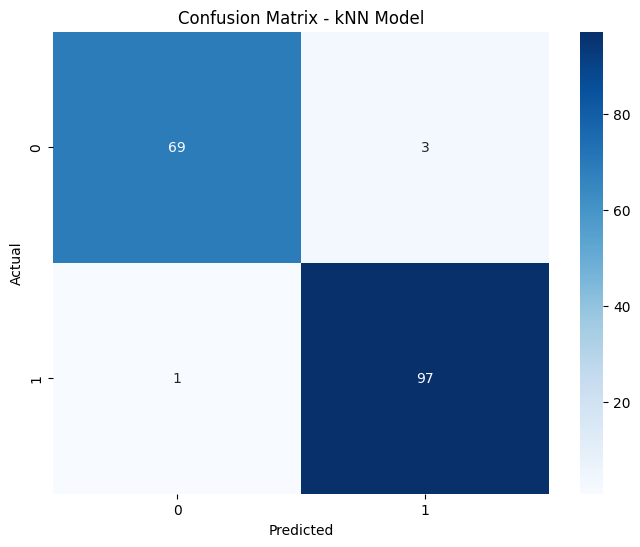

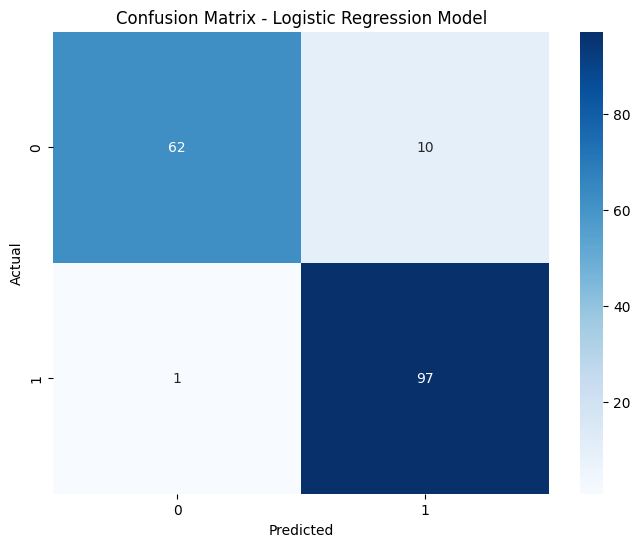

Metrics for kNN Model:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.97      0.99      0.98        98

    accuracy                           0.98       170
   macro avg       0.98      0.97      0.98       170
weighted avg       0.98      0.98      0.98       170

Metrics for Logistic Regression Model:
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        72
           1       0.91      0.99      0.95        98

    accuracy                           0.94       170
   macro avg       0.95      0.93      0.93       170
weighted avg       0.94      0.94      0.93       170



In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

best_knn_model = find_best_k_value(knn_accuracies2, knn_accuracies3, k_values) # best k value for kNN model
best_knn_model.fit(train_data, train_labels)
bests_predicts = best_knn_model.predict(test_data)
knn_cm = confusion_matrix(test_labels, bests_predicts)


# Plot the confusion matrix for kNN model
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - kNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion matrix for Logistic Regression model
logreg_cm = confusion_matrix(test_labels, logistic_regression_predictions)

# Plot the confusion matrix for Logistic Regression model
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate metrics for kNN model
knn_report = classification_report(test_labels, bests_predicts)
print("Metrics for kNN Model:")
print(knn_report)

# Calculate metrics for Logistic Regression model
logreg_report = classification_report(test_labels, logistic_regression_predictions)
print("Metrics for Logistic Regression Model:")
print(logreg_report)


### 5.2. Precision-Recall Curves

Evaluate the Precision-Recall curves for both models:
- Plot and analyze the curves

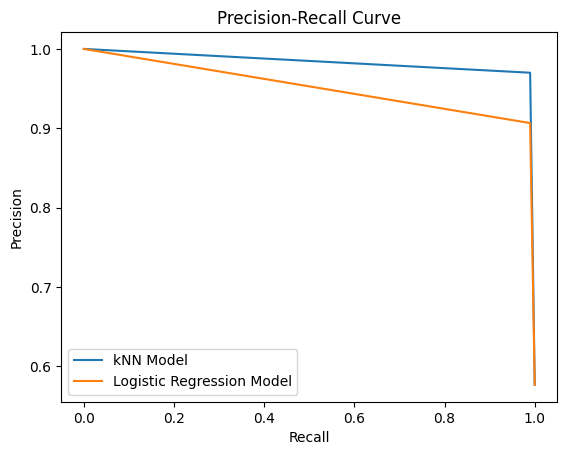

In [40]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for kNN model
knn_precision, knn_recall, _ = precision_recall_curve(test_labels, bests_predicts)

# Calculate precision and recall for Logistic Regression model
logreg_precision, logreg_recall, _ = precision_recall_curve(test_labels, logistic_regression_predictions)

# Plot the Precision-Recall curves
plt.plot(knn_recall, knn_precision, label='kNN Model')
plt.plot(logreg_recall, logreg_precision, label='Logistic Regression Model')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


To analyze the Precision-Recall curves, we can observe the following:

1. kNN Model Curve: The Precision-Recall curve for the kNN model shows a trade-off between precision and recall. As the recall increases, the precision decreases. This indicates that as we try to capture more positive instances (higher recall), there is a higher chance of including false positives (lower precision). The curve shows a steep drop in precision as the recall increases, suggesting that the model may not perform well in terms of precision when trying to capture a large number of positive instances.

2. Logistic Regression Model Curve: The Precision-Recall curve for the Logistic Regression model also shows a trade-off between precision and recall. However, compared to the kNN model, the curve for the Logistic Regression model is relatively smoother. This suggests that the Logistic Regression model may have a more balanced performance in terms of precision and recall. As the recall increases, the precision decreases, but the decrease is not as steep as in the kNN model. This indicates that the Logistic Regression model may be able to capture a higher number of positive instances with a relatively lower number of false positives.

Overall, both models show a similar trade-off between precision and recall, but the Logistic Regression model appears to have a more balanced performance. Depending on the specific requirements of the problem at hand, either model may be suitable. It is important to consider the trade-off between precision and recall and choose the model that aligns with the desired performance characteristics.

### 5.3. Choose an appropriate metric to evaulate the models. Compare the models and discuss why you chose the metric.

In [41]:
# Choose an appropriate metric to evaluate the models
# try different metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Calculate f1-score for kNN model
knn_f1_score = f1_score(test_labels, bests_predicts)
print(f'F1-score for kNN model: {knn_f1_score}')

# Calculate f1-score for Logistic Regression model
logreg_f1_score = f1_score(test_labels, logistic_regression_predictions)
print(f'F1-score for Logistic Regression model: {logreg_f1_score}')

# Calculate precision for kNN model
knn_precision = precision_score(test_labels, bests_predicts)
print(f'Precision for kNN model: {knn_precision}')

# Calculate precision for Logistic Regression model
logreg_precision = precision_score(test_labels, logistic_regression_predictions)
print(f'Precision for Logistic Regression model: {logreg_precision}')

# Calculate recall for kNN model
knn_recall = recall_score(test_labels, bests_predicts)
print(f'Recall for kNN model: {knn_recall}')

# Calculate recall for Logistic Regression model
logreg_recall = recall_score(test_labels, logistic_regression_predictions)
print(f'Recall for Logistic Regression model: {logreg_recall}')


 

F1-score for kNN model: 0.9797979797979798
F1-score for Logistic Regression model: 0.9463414634146342
Precision for kNN model: 0.97
Precision for Logistic Regression model: 0.9065420560747663
Recall for kNN model: 0.9897959183673469
Recall for Logistic Regression model: 0.9897959183673469


The F1 score is a suitable metric for evaluating the models in this dataset for the following reasons:

1. Balance between precision and recall: The F1 score considers both precision and recall, which are important metrics in classification tasks. It provides a balanced measure of the model's performance by taking into account both the ability to correctly identify positive instances (recall) and the ability to minimize false positives (precision).

2. Imbalanced dataset: If the dataset is imbalanced, meaning that the number of instances in each class is significantly different, accuracy alone may not be a reliable metric. The F1 score takes into account the true positives, false positives, and false negatives, making it more robust in the presence of imbalanced classes.

3. Emphasis on minimizing false positives and false negatives: In some cases, the cost of false positives or false negatives may be higher than others. The F1 score considers both types of errors and provides a single metric that can be used to evaluate the model's performance in terms of minimizing these errors.

4. Harmonic mean: The F1 score is calculated as the harmonic mean of precision and recall. The harmonic mean gives more weight to lower values, which means that the F1 score is more sensitive to imbalances in precision and recall. This makes it a suitable metric for datasets where both precision and recall are important.

Overall, the F1 score is a reliable metric for evaluating the models in this dataset because it considers both precision and recall, is robust to imbalanced classes, and provides a balanced measure of the model's performance in terms of minimizing false positives and false negatives.